In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import cleaned casualty data
casu = pd.read_csv('updated_casu_data.csv', low_memory=False)
casu.head()

,accident_index,accident_year,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201001BS70003,2010,1,1,6,3,0,0,0,0,0,1,1,-1
1,201001BS70004,2010,3,1,8,3,4,3,0,0,2,0,1,-1
2,201001BS70006,2010,1,1,6,3,0,0,0,0,0,1,1,-1
3,201001BS70007,2010,2,1,-1,3,0,0,1,0,0,9,1,-1
4,201001BS70008,2010,2,1,6,3,0,0,0,0,0,5,1,-1


In [3]:
acc = pd.read_csv('updated_acc_data.csv', low_memory=False)
acc.head()

,accident_index,accident_year,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,accident_month,hour
0,201001BS70003,2010,1,3,2,1,2010-11-01,2,2023-01-04 07:30:00,12,...,1,8,2,0,0,1,1,2,11,7
1,201001BS70004,2010,1,3,1,1,2010-11-01,2,2023-01-04 18:35:00,12,...,4,2,2,0,0,1,1,2,11,18
2,201001BS70006,2010,1,3,2,1,2010-12-01,3,2023-01-04 10:22:00,12,...,1,1,1,0,0,1,1,2,12,10
3,201001BS70007,2010,1,3,2,1,2010-02-01,7,2023-01-04 21:21:00,12,...,4,1,1,0,0,1,1,2,2,21
4,201001BS70008,2010,1,3,2,1,2010-04-01,2,2023-01-04 20:35:00,12,...,4,1,2,0,0,1,1,2,4,20


In [4]:
casu.shape

(2082582, 14)

In [5]:
acc.shape

(1575343, 30)

In [6]:
casu.isna().sum()

accident_index                        0
accident_year                         0
casualty_class                        0
sex_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
dtype: int64

In [7]:
acc.isna().sum()

accident_index                                 0
accident_year                                  0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
first_road_class                               0
first_road_number                              0
road_type                                      0
speed_limit                                    0
junction_detail                                0
junction_control                               0
second_road_class                              0
second_road_number                             0
pedestrian_crossing_human_control              0
pedestrian_crossing_physical_facilities        0
light_conditions    

In [8]:
casu.dtypes

accident_index                        object
accident_year                          int64
casualty_class                         int64
sex_of_casualty                        int64
age_band_of_casualty                   int64
casualty_severity                      int64
pedestrian_location                    int64
pedestrian_movement                    int64
car_passenger                          int64
bus_or_coach_passenger                 int64
pedestrian_road_maintenance_worker     int64
casualty_type                          int64
casualty_home_area_type                int64
casualty_imd_decile                    int64
dtype: object

In [9]:
acc.dtypes

accident_index                                  object
accident_year                                    int64
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                         int64
first_road_class                                 int64
first_road_number                                int64
road_type                                        int64
speed_limit                                    float64
junction_detail                                  int64
junction_control                                 int64
second_road_class                                int64
second_road_number                               int64
pedestrian

In [10]:
#reconvert the data types for accidents
acc['date'] = pd.to_datetime(acc['date'])
acc['time'] = pd.to_datetime(acc['time'])
acc['accident_month'] = acc['date'].dt.month
acc['hour'] = acc['time'].dt.hour

In [11]:
acc['police_force'] = acc['police_force'].astype('category')
acc['accident_severity'] = acc['accident_severity'].astype('category')
acc['local_authority_district'] = acc['local_authority_district'].astype('category')
acc['first_road_class'] = acc['first_road_class'].astype('category')
acc['first_road_number'] = acc['first_road_number'].astype('category')
acc['road_type'] = acc['road_type'].astype('category')
acc['junction_detail'] = acc['junction_detail'].astype('category')
acc['junction_control'] = acc['junction_control'].astype('category')
acc['second_road_class'] = acc['second_road_class'].astype('category')
acc['second_road_number'] = acc['second_road_number'].astype('category')
acc['pedestrian_crossing_human_control'] = acc['pedestrian_crossing_human_control'].astype('category')
acc['pedestrian_crossing_physical_facilities'] = acc['pedestrian_crossing_physical_facilities'].astype('category')
acc['light_conditions'] = acc['light_conditions'].astype('category')
acc['weather_conditions'] = acc['weather_conditions'].astype('category')
acc['road_surface_conditions'] = acc['road_surface_conditions'].astype('category')
acc['special_conditions_at_site'] = acc['special_conditions_at_site'].astype('category')
acc['carriageway_hazards'] = acc['carriageway_hazards'].astype('category')
acc['urban_or_rural_area'] = acc['urban_or_rural_area'].astype('category')
acc['did_police_officer_attend_scene_of_accident'] = acc['did_police_officer_attend_scene_of_accident'].astype('category')
acc['trunk_road_flag'] = acc['trunk_road_flag'].astype('category')
acc['accident_month'] = acc['accident_month'].astype('category')
acc['hour'] = acc['hour'].astype('category')

In [12]:
#reconvert the data types for casualties
casu['casualty_class'] = casu['casualty_class'].astype('category')
casu['sex_of_casualty'] = casu['sex_of_casualty'].astype('category')
casu['age_band_of_casualty'] = casu['age_band_of_casualty'].astype('category')
casu['casualty_severity'] =casu['casualty_severity'].astype('category')
casu['pedestrian_location'] = casu['pedestrian_location'].astype('category')
casu['pedestrian_movement'] = casu['pedestrian_movement'].astype('category')
casu['car_passenger'] = casu['car_passenger'].astype('category')
casu['bus_or_coach_passenger'] = casu['bus_or_coach_passenger'].astype('category')
casu['pedestrian_road_maintenance_worker'] = casu['pedestrian_road_maintenance_worker'].astype('category')
casu['casualty_type'] = casu['casualty_type'].astype('category')
casu['casualty_home_area_type'] = casu['casualty_home_area_type'].astype('category')
casu['casualty_imd_decile'] = casu['casualty_imd_decile'].astype('category')

In [13]:
acc.dtypes

accident_index                                         object
accident_year                                           int64
police_force                                         category
accident_severity                                    category
number_of_vehicles                                      int64
number_of_casualties                                    int64
date                                           datetime64[ns]
day_of_week                                             int64
time                                           datetime64[ns]
local_authority_district                             category
first_road_class                                     category
first_road_number                                    category
road_type                                            category
speed_limit                                           float64
junction_detail                                      category
junction_control                                     category
second_r

In [14]:
casu.dtypes

accident_index                          object
accident_year                            int64
casualty_class                        category
sex_of_casualty                       category
age_band_of_casualty                  category
casualty_severity                     category
pedestrian_location                   category
pedestrian_movement                   category
car_passenger                         category
bus_or_coach_passenger                category
pedestrian_road_maintenance_worker    category
casualty_type                         category
casualty_home_area_type               category
casualty_imd_decile                   category
dtype: object

All columns will be looked at to see the ones that have direct effects on accidents

In [15]:
# first road class

acc.first_road_class.unique()

[4, 3, 6, 5, 1, 2]
Categories (6, int64): [1, 2, 3, 4, 5, 6]

In [16]:
acc.first_road_class.value_counts()

3    713171
6    489785
4    196092
5    116942
1     54979
2      4374
Name: first_road_class, dtype: int64

Interpretation of first road class values

1 - Motorway,

2 - A(M) road class, 

3 - A road class, 

4 - B road class, 

5 - C road class, 

6 - Unclassified class


Class 3 road class has the highest count of accidents in the time frame of 12 years. It had a count of 713171 accidents. 2 road class has the least count of 4374 accidents.

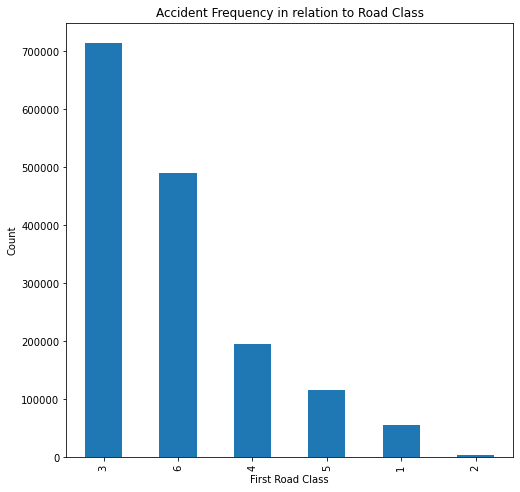

In [17]:
#plot the first road class
acc.first_road_class.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('First Road Class')
plt.ylabel('Count')
plt.title('Accident Frequency in relation to Road Class');

In [18]:
# second road class
acc.second_road_class.unique()

[6, 3, 4, -1, 5, 1, 2, 9, 0]
Categories (9, int64): [-1, 0, 1, 2, ..., 4, 5, 6, 9]

In [19]:
acc.second_road_class.value_counts()

6     634529
-1    564112
3     158956
0      79426
5      65924
4      62019
1       9327
2       1049
9          1
Name: second_road_class, dtype: int64

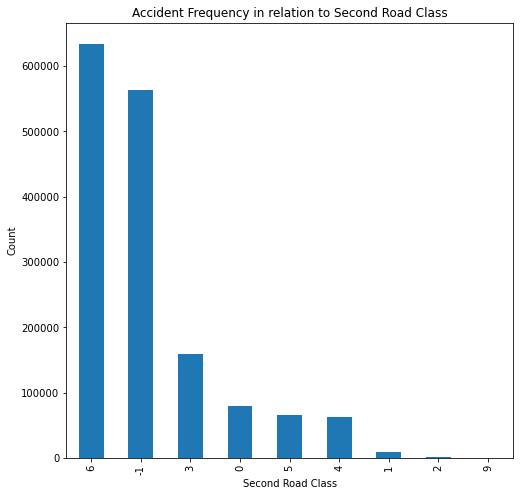

In [20]:
#plot with a bar chart
acc.second_road_class.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Second Road Class')
plt.ylabel('Count')
plt.title('Accident Frequency in relation to Second Road Class');

Interpretation of Second Road Class Values

0 - Not at junction or within 20 metres, 

1 - Motorway, 

2 - A(M)

3 - A

4 - B

5 - C

6 - Unclassified

9 - 

-1 - 


Majority of the records for second road class are either unclassified or not available

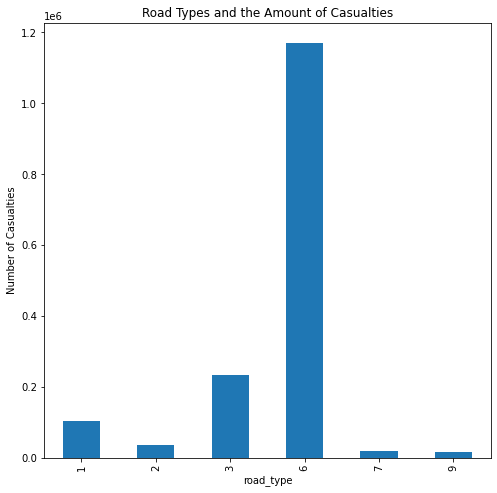

In [21]:
#road type
acc.groupby('road_type')['number_of_casualties'].count().plot(kind='bar', figsize=(8,8))
plt.ylabel('Number of Casualties')
plt.title('Road Types and the Amount of Casualties');

Intepretation of Road Types
1 - Roundabout,

2 - One Way Street,

3 - Dual Carriageway,

6 - Single Carriageway,

7 - Slip Road,

9 - Unknown



All road types had accident records but road type 6 had the most casualties. Road type 6 is the Single Carriageway, it could be said that single carriageways are one of the causes of car accidents.

In [22]:
#speed limit
acc.speed_limit.value_counts()

 30.0    983977
 60.0    214368
 40.0    131007
 70.0    103836
 20.0     80839
 50.0     61217
-1.0         92
 10.0         5
 15.0         1
 0.0          1
Name: speed_limit, dtype: int64

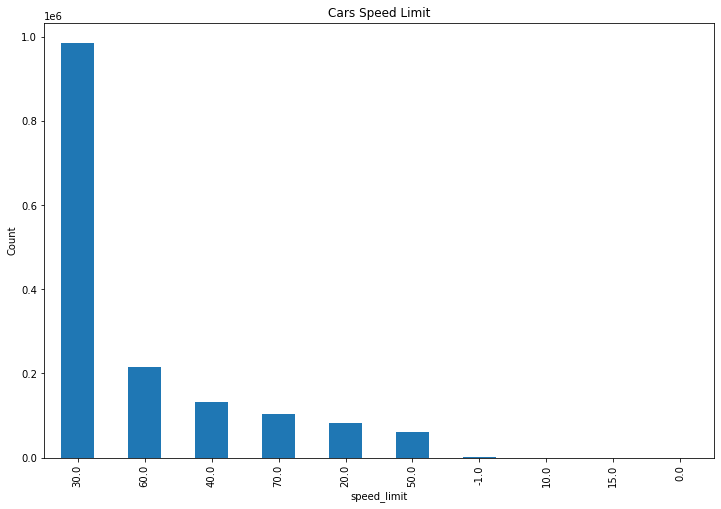

In [23]:
#use a bar plot to view the different speed limit
acc.speed_limit.value_counts().plot(kind='bar', figsize=(12,8))
plt.xlabel('speed_limit')
plt.ylabel('Count')
plt.title('Cars Speed Limit');

Most cars involved in car accidents were not above the speed limit. Only 92 were above the speed range. Majority of the car accidents were in the 30 speed limit. Over Speeding might not be the cause of accidents here then.

In [24]:
#urban or rural
#view the count of each location using value counts
acc.urban_or_rural_area.value_counts()

1     1041058
2      534283
-1          1
3           1
Name: urban_or_rural_area, dtype: int64

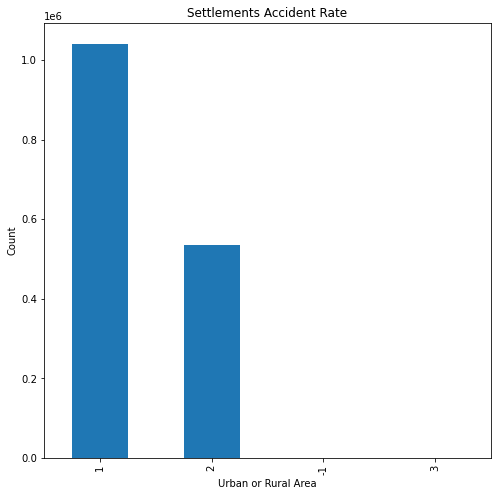

In [25]:
#plot using a bar chart
acc.urban_or_rural_area.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Urban or Rural Area')
plt.ylabel('Count')
plt.title('Settlements Accident Rate');

A very large Majority of Accidents occured in the Urban Areas compared to the Rural Areas

The Settlement area can be used as a feature to determine accidents.

Next, what road class (first) is located in the urban and rural areas

In [26]:
#view the carriageway hazards
acc.carriageway_hazards.unique()

[0, 6, 2, 1, 7, 3, -1, 9]
Categories (8, int64): [-1, 0, 1, 2, 3, 6, 7, 9]

Interpretation of Carriageway hazards values
0 - None,

1 - Vehicle load on road

2 - Other object on road

3 - Previous Accident

6 - Pedestrian in carriageway - not injured

7 - Any animal in carriageway (except ridden horse)

9 - unknown (self reported)

-1 - Data missing or out of range

In [27]:
#group the carriageway hazards and road type together
car1 = acc.groupby(['road_type'])['carriageway_hazards'].value_counts()
car1

road_type    
1          0      102578
           2         372
           9         285
           1         124
           -1        102
           6          78
           3          74
           7          56
2          0       33315
           9         361
           2         287
           6         214
           1          62
           7          25
           3          20
           -1         13
3          0      226322
           2        2795
           3        1145
           7         903
           1         686
           9         475
           6         325
           -1        183
6          0     1145359
           2        8719
           7        5895
           6        2927
           9        2468
           1        1500
           3        1074
           -1        801
7          0       18425
           2         155
           9         152
           3          54
           7          54
           1          32
           6          27
           

From the groupby performed above, majority of the car accidents are not caused by carriageway hazards in both single and dual carriageways.

Single carriageways - 1145359 accidents are not caused by carriageway hazards, Other objects on the road caused 8719 accidents while Animals in carriageway caused 5895 accidents

Dual carriageways - 226322 accidents are not caused by carriageway hazards, Other objects on the road caused 2795 accidents while 1145 accidents were caused by Previous Accidents.


To conclude, carriageway hazards is not a reliable cause of accidents.

In [28]:
#view the unique values of junction detail
acc.junction_detail.value_counts()

0     635074
3     485448
6     152651
1     135352
8      50559
9      49658
5      22306
2      20090
7      17741
99      6446
-1        18
Name: junction_detail, dtype: int64

Intepretation of Junction detail values

0 - Not at junction or within 20 metres, 

1 - Roundabout, 

2 - Mini-roundabout, 

3 - T or staggered junction, 

5 - Slip road, 

6 - Crossroads, 

7 - More than 4 arms (not roundabout), 

8 - Private drive or entrance, 

9 - Other junction, 

99 - unknown (self reported), 

-1 - Data missing or out of range

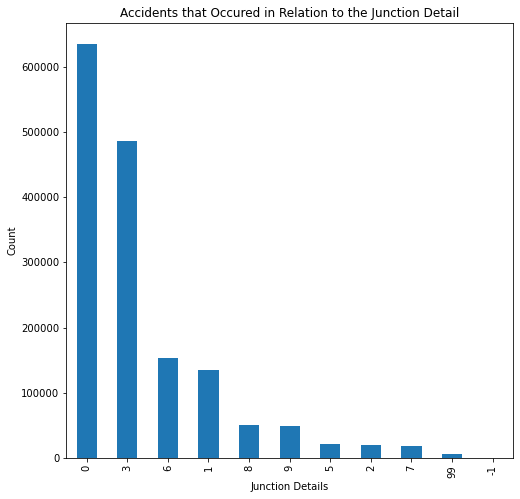

In [29]:
#plot the juction detail
acc.junction_detail.value_counts().plot(kind='bar', figsize=(8,8))
plt.xlabel('Junction Details')
plt.ylabel('Count')
plt.title('Accidents that Occured in Relation to the Junction Detail');

Most car accidents did not occur at junctions but the second majority of accidents occured at T or staggered junctions.

To determine if this feature will be considered a ratio will be done

In [30]:
acc.junction_detail.count()

1575343

In [31]:
#percentage of '0'
635074/1575343 * 100

40.31337937198439

In [32]:
#percentage of '3'
485448/1575343 * 100

30.815384332174013

only 40% did no occur at junctions. Therefore this feature will be used

In [33]:
#junction control
acc.junction_control.value_counts()

4     745129
-1    627137
2     169211
0      10836
9      10683
3       8700
1       3647
Name: junction_control, dtype: int64

Interpretation of junction control values

0 - Not at junction or within 20 metres,

1 - Authorised person, 

2 - Auto traffic signal, 

3 - Stop sign, 

4 - Give way or uncontrolled, 

9 - unknown (self reported), 

-1 - Data missing or out of range


Majority of the accidents occured when there was no junction control

In [34]:
#view the values of light conditions
acc.light_conditions.value_counts()

1     1147653
4      311732
6       81061
7       25588
5        9286
-1         23
Name: light_conditions, dtype: int64

Interpretation of the Light Condition values

1 - Daylight, 

4 - Darkness - lights lit

5 - Darkness - lights unlit

6 - Darkness - no lighting

7 - Darkness - lighting unknown

-1 - Data missing or out of range


Majority of the Car accidents happened either during daylight(1), the second majority of accidents happened at night but when the lights were lit.

Therefore, light conditions can't be used to determine or predict accidents.

In [35]:
#view values of weather conditions
acc.weather_conditions.value_counts()

1     1268742
2      179057
9       36151
8       33383
5       20190
4       17951
3        9985
7        7697
6        2091
-1         96
Name: weather_conditions, dtype: int64

Interpretation of Weather Condition Values

1 - Fine no high winds, 

2 - Raining no high winds, 

3 - Snowing no high winds, 

4 - Fine + high winds, 

5 - Raining + high winds, 

6 - Snowing + high winds, 

7 - Fog or mist, 

8 - Other, 

9 - Unknown, 

-1 - Data missing or out of range



Majority of the accidents occured during Fine Weathers, therefore weather is not a suitable factor for accidents.

In [36]:
#view values of pedestrian control
acc.pedestrian_crossing_human_control.value_counts()

0     1544175
9       16065
2        9425
1        4552
-1       1126
Name: pedestrian_crossing_human_control, dtype: int64

Interpretation of Values

0 - None within 50 metres, 

1 - Control by school crossing patrol, 

2 - Control by other authorised person, 

9 - unknown (self reported), 

-1 - Data missing or out of range


Majority of the accidents occured when there was no Pedestrian human control. The least accidents occured when there were controls, either a School crossing patrol or an Authorised Person.

In [37]:
#view values for Pedestrial Facilities
acc.pedestrian_crossing_physical_facilities.value_counts()

0     1259094
5      118592
4       89048
1       52104
8       36116
9       15056
7        4286
-1       1047
Name: pedestrian_crossing_physical_facilities, dtype: int64

Interpretation of Values

0 - No physical crossing facilities within 50 metres,

1 - Zebra, 

4 - Pelican, puffin, toucan or similar non-junction pedestrian light crossing, 

5 - Pedestrian phase at traffic signal junction, 

7 - Footbridge or subway, 

8 - Central refuge, 

9 - unknown (self reported), 

-1 - Data missing or out of range


Majority of the accidents occured at places where the facilities were absent.

This does not really reduce the rate of car accidents.

In [38]:
#view the values of road surface conditions
acc.road_surface_conditions.value_counts()

1     1115176
2      411250
4       27850
3        9632
9        5679
-1       3624
5        2132
Name: road_surface_conditions, dtype: int64

Interpretation of Values

1 - Dry,

2 - Wet or Damp, 

3 - Snow, 

4 - Frost or Ice, 

5 - Flood over 3cm. deep, 

9 - Unknown(self reported),

-1 - Data missing or out of range


Majority of the accidents occured when the road surface was dry, the second majority happened when the road was wet or damp.



In [39]:
#view the values of special conditions at site
acc.special_conditions_at_site.value_counts()

0     1529607
4       17696
9        8785
7        4344
6        3878
5        3789
1        3146
3        2230
-1       1168
2         700
Name: special_conditions_at_site, dtype: int64

Interpretation of Values

0 - None, 

1 - Auto traffic signal - out, 

2 - Auto signal part defective, 

3 - Road sign or marking defective or obscured, 

4 - Roadworks, 

5 - Road surface defective, 

6 - Oil or diesel, 

7 - Mud,

9 - Unknown(self reported), 

-1 - Data missing or out of range


Special Conditions had little to no impact on Car accidents

In [40]:
#view values of trunk road flag
acc.trunk_road_flag.value_counts()

2     1312036
-1     152237
1      111070
Name: trunk_road_flag, dtype: int64

Interpretation of values

1 - Trunk (Roads managed by Highways England), 

2 - Non-trunk, 

-1 - Data missing or out of range 


Majority of the accidents occured where there was no trunk flag

In [41]:
acc.columns

Index(['accident_index', 'accident_year', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'first_road_class',
       'first_road_number', 'road_type', 'speed_limit', 'junction_detail',
       'junction_control', 'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'accident_month', 'hour'],
      dtype='object')

In [42]:
#drop columns for accident that won't be needed
acc.drop(['second_road_class', 'second_road_number', 'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'speed_limit', 'special_conditions_at_site'], axis = 1, inplace=True)

In [43]:
acc.columns

Index(['accident_index', 'accident_year', 'police_force', 'accident_severity',
       'number_of_vehicles', 'number_of_casualties', 'date', 'day_of_week',
       'time', 'local_authority_district', 'first_road_class',
       'first_road_number', 'road_type', 'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'accident_month', 'hour'],
      dtype='object')

In [44]:
casu.columns

Index(['accident_index', 'accident_year', 'casualty_class', 'sex_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'pedestrian_road_maintenance_worker', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [45]:
#Casualty

#view values for pedestrian_location
casu.pedestrian_location.value_counts()

0     1809515
5      120902
1       40060
9       28629
6       28518
4       21552
10      20378
8        9792
7        1403
2        1158
3         657
-1         18
Name: pedestrian_location, dtype: int64

0 - Not a pedestrian

Majority of the casualties occured to non pedestrians. This is more than 50% of the total casualties

5 - In carriageway, crossing elsewhere

This is the second majority of pedestrian location

In [46]:
#view values for pedestrian_movement
casu.pedestrian_movement.value_counts()

0     1809510
1       93947
9       64137
3       55554
2       19839
5       13930
4       13247
8        6248
7        4107
6        2040
-1         23
Name: pedestrian_movement, dtype: int64

0 - Not a pedestrian

Majority of the casualties occured to non pedestrians. This is more than 50% of the total casualties



In [47]:
#view values for car passenger
casu.car_passenger.value_counts()

0     1686621
1      248295
2      143625
-1       3178
9         863
Name: car_passenger, dtype: int64

Majority of the casualties did not happen to passengers (0 - Not a passenger)

Being a car passenger does not really determine casualty. 

Most casualties happened to the drivers

In [48]:
#view values for bus or coach passenger
casu.bus_or_coach_passenger.value_counts()

0     2035222
4       29125
3       12936
2        2466
1        2464
-1        313
9          56
Name: bus_or_coach_passenger, dtype: int64

0 - Not a bus or coach passenger

Majority of casualties did not happen to bus or coach passengers

In [49]:
#view values for pedestrian_location
casu.pedestrian_road_maintenance_worker.value_counts()

0     2016527
2       64354
1         793
-1        718
3         190
Name: pedestrian_road_maintenance_worker, dtype: int64

0 - No/Not applicable

A huge amount of casualties did not affect pedestrian road maintenance workers

In [50]:
casu.casualty_type.value_counts()

9     1206537
0      273064
1      219043
3       90447
5       75159
19      51433
11      51012
8       30795
4       24969
2       23975
90       9716
21       8994
10       4948
20       4447
97       1958
22       1736
98       1370
17       1182
16       1160
23        506
18        115
99          9
-1          7
Name: casualty_type, dtype: int64

9 - Car occupant

Majority of the casualties happened to car occupants

In [51]:
#drop columns that have little to no effect
casu.drop(['pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker'], axis=1, inplace=True)

In [52]:
casu.columns

Index(['accident_index', 'accident_year', 'casualty_class', 'sex_of_casualty',
       'age_band_of_casualty', 'casualty_severity', 'casualty_type',
       'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [53]:
#merge both datasets
new_df = pd.merge(left=acc, right=casu, how='left', on='accident_index')

In [54]:
new_df.head()

,accident_index,accident_year_x,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,...,accident_month,hour,accident_year_y,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201001BS70003,2010,1,3,2,1,2010-11-01,2,2023-01-04 07:30:00,12,...,11,7,2010,1,1,6,3,1,1,-1
1,201001BS70004,2010,1,3,1,1,2010-11-01,2,2023-01-04 18:35:00,12,...,11,18,2010,3,1,8,3,0,1,-1
2,201001BS70006,2010,1,3,2,1,2010-12-01,3,2023-01-04 10:22:00,12,...,12,10,2010,1,1,6,3,1,1,-1
3,201001BS70007,2010,1,3,2,1,2010-02-01,7,2023-01-04 21:21:00,12,...,2,21,2010,2,1,-1,3,9,1,-1
4,201001BS70008,2010,1,3,2,1,2010-04-01,2,2023-01-04 20:35:00,12,...,4,20,2010,2,1,6,3,5,1,-1


In [55]:
new_df.isna().sum()

accident_index                                 0
accident_year_x                                0
police_force                                   0
accident_severity                              0
number_of_vehicles                             0
number_of_casualties                           0
date                                           0
day_of_week                                    0
time                                           0
local_authority_district                       0
first_road_class                               0
first_road_number                              0
road_type                                      0
junction_detail                                0
junction_control                               0
pedestrian_crossing_human_control              0
carriageway_hazards                            0
urban_or_rural_area                            0
did_police_officer_attend_scene_of_accident    0
trunk_road_flag                                0
accident_month      

In [56]:
new_df.dtypes

accident_index                                         object
accident_year_x                                         int64
police_force                                         category
accident_severity                                    category
number_of_vehicles                                      int64
number_of_casualties                                    int64
date                                           datetime64[ns]
day_of_week                                             int64
time                                           datetime64[ns]
local_authority_district                             category
first_road_class                                     category
first_road_number                                    category
road_type                                            category
junction_detail                                      category
junction_control                                     category
pedestrian_crossing_human_control                    category
carriage

In [57]:
new_df.shape

(2082293, 30)

### Model Building

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss

In [59]:
features = new_df.drop(['date','accident_severity','time', 'accident_year_x', 'accident_index', 'accident_year_y'], axis=1)
target = new_df[['accident_severity']]

In [60]:
features.shape

(2082293, 24)

In [61]:
target.shape

(2082293, 1)

In [62]:
features.columns

Index(['police_force', 'number_of_vehicles', 'number_of_casualties',
       'day_of_week', 'local_authority_district', 'first_road_class',
       'first_road_number', 'road_type', 'junction_detail', 'junction_control',
       'pedestrian_crossing_human_control', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'accident_month', 'hour', 'casualty_class',
       'sex_of_casualty', 'age_band_of_casualty', 'casualty_severity',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')

In [63]:
target.head()

,accident_severity
0,3
1,3
2,3
3,3
4,3


In [64]:
target.value_counts()

accident_severity
3                    1697362
2                     350695
1                      34236
dtype: int64

From the value count of the target variable, there is an imbalance in the data.

Therefore, it will be downsized.

In [65]:
#downsize the accident severity
import numpy as np
label = 'accident_severity'

g = new_df.groupby(label, group_keys=False)
balanced_df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()))).reset_index(drop=True)
balanced_df.head()

,accident_index,accident_year_x,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,...,accident_month,hour,accident_year_y,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201160M032091,2011,60,1,2,2,2011-02-26,7,2023-01-04 20:19:00,724,...,2,20,2011,2,2,7,1,9,2,-1
1,201006K035947,2010,6,1,2,5,2010-11-09,7,2023-01-04 14:20:00,100,...,11,14,2010,1,1,6,3,9,1,-1
2,201332B463913,2013,32,1,2,4,2013-04-12,4,2023-01-04 10:22:00,350,...,4,10,2013,2,2,11,1,9,1,-1
3,2017360238898,2017,36,1,4,3,2017-11-13,2,2023-01-04 08:55:00,400,...,11,8,2017,1,2,5,3,9,2,6
4,2018440430234,2018,44,1,2,2,2018-11-16,6,2023-01-04 06:06:00,502,...,11,6,2018,1,1,6,1,9,1,8


In [66]:
balanced_df.accident_severity.value_counts()

1    34236
2    34236
3    34236
Name: accident_severity, dtype: int64

In [67]:
#resplit the data
features = balanced_df.drop(['date','accident_severity','time', 'accident_year_x', 'accident_index', 'accident_year_y'], axis=1)
target = balanced_df[['accident_severity']]

In [68]:
features.shape

(102708, 24)

In [69]:
target.shape

(102708, 1)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(features,target, train_size=0.7, test_size=0.3, shuffle=True, stratify=target, random_state=42)


In [71]:
x_train.shape

(71895, 24)

In [72]:
y_train.shape

(71895, 1)

In [73]:
y_test.shape

(30813, 1)

In [74]:
#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [75]:
xtrain_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [76]:
xtest_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [77]:
xtrain_scaled.var()

police_force                                   1.000014
number_of_vehicles                             1.000014
number_of_casualties                           1.000014
day_of_week                                    1.000014
local_authority_district                       1.000014
first_road_class                               1.000014
first_road_number                              1.000014
road_type                                      1.000014
junction_detail                                1.000014
junction_control                               1.000014
pedestrian_crossing_human_control              1.000014
carriageway_hazards                            1.000014
urban_or_rural_area                            1.000014
did_police_officer_attend_scene_of_accident    1.000014
trunk_road_flag                                1.000014
accident_month                                 1.000014
hour                                           1.000014
casualty_class                                 1

In [78]:
xtest_scaled.var()

police_force                                   0.986342
number_of_vehicles                             0.770662
number_of_casualties                           0.979332
day_of_week                                    1.001703
local_authority_district                       0.988691
first_road_class                               0.993145
first_road_number                              1.017652
road_type                                      1.006148
junction_detail                                0.980731
junction_control                               1.000725
pedestrian_crossing_human_control              1.023967
carriageway_hazards                            1.098431
urban_or_rural_area                            0.999997
did_police_officer_attend_scene_of_accident    0.991683
trunk_road_flag                                0.971619
accident_month                                 1.006689
hour                                           0.991923
casualty_class                                 1

The data has been downsized and scaled, next different algorithms will be tested

In [79]:
features.dtypes

police_force                                   category
number_of_vehicles                                int64
number_of_casualties                              int64
day_of_week                                       int64
local_authority_district                       category
first_road_class                               category
first_road_number                              category
road_type                                      category
junction_detail                                category
junction_control                               category
pedestrian_crossing_human_control              category
carriageway_hazards                            category
urban_or_rural_area                            category
did_police_officer_attend_scene_of_accident    category
trunk_road_flag                                category
accident_month                                 category
hour                                           category
casualty_class                                 c

In [80]:
target.dtypes

accident_severity    category
dtype: object

In [81]:
# Import KNeighborsClassifier from sklearn's neighbors module and GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [84]:
#downsized unscaled
models = {
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          
          "SVC": SVC(),
          
          "LinearSVC": LinearSVC(), 

          'LogisticRregression': LogisticRegression(),

          #'KNeighborsClassifier': KNeighborsClassifier(),

          "RandomForestClassifier": RandomForestClassifier(),

          "GaussianNB": GaussianNB()}

In [85]:
#building on downsized unscaled data

results = {}

for model_name, model in models.items():
    model.fit(x_train, y_train.values.ravel())
    results[model_name] = model.score(x_test, y_test.values.ravel())
    
results

C:\Users\Toyin Alade\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Toyin Alade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'DecisionTreeClassifier': 0.8207574724953753,
 'SVC': 0.38928374387433873,
 'LinearSVC': 0.6853925291273164,
 'LogisticRregression': 0.5192613507285886,
 'RandomForestClassifier': 0.8605458734949535,
 'GaussianNB': 0.7048648297796385}

In [88]:
#building on downsized scaled data
models2 = {
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          
          "SVC": SVC(),
          
          "LinearSVC": LinearSVC(), 

          'LogisticRegression': LogisticRegression(),

          #'KNeighborsClassifier': KNeighborsClassifier(),

          "RandomForestClassifier": RandomForestClassifier(),

          "GaussianNB": GaussianNB()}

In [89]:
results2 = {}

for model_name, model in models2.items():
    model.fit(xtrain_scaled, y_train.values.ravel())
    results2[model_name] = model.score(xtest_scaled, y_test.values.ravel())
    
results2

C:\Users\Toyin Alade\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'DecisionTreeClassifier': 0.8223152565475611,
 'SVC': 0.8360432285074482,
 'LinearSVC': 0.7405640476422289,
 'LogisticRegression': 0.7923603673774057,
 'RandomForestClassifier': 0.8586635510985623,
 'GaussianNB': 0.7040859377535456}

Random Forest Classifier had the highest accuracy of 0.86 with unscaled data

Next the model will be built

In [90]:
clf = RandomForestClassifier()

In [91]:
#train the model
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier()

In [92]:
# performing predictions on the test dataset
y_pred = clf.predict(x_test)

In [93]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8573653977217408


In [94]:
#create a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.87      0.85      0.86     10271
           2       0.87      0.79      0.83     10271
           3       0.83      0.93      0.88     10271

    accuracy                           0.86     30813
   macro avg       0.86      0.86      0.86     30813
weighted avg       0.86      0.86      0.86     30813



In [95]:
# Create a confusion matrix using the confusion_matrix function
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[8769,  868,  634],
       [ 898, 8121, 1252],
       [ 378,  365, 9528]], dtype=int64)

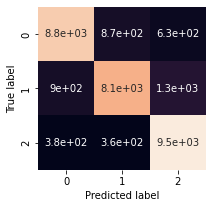

In [96]:
# Create a more visual confusion matrix
import seaborn as sns

def plot_conf_mat(y_test, y_pred):
    """
    Plots a confusion matrix using seaborn's heatmap()
    """
    fix, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_pred)

In [97]:
# Find the most important features using feature importance

feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

casualty_severity                              0.463527
number_of_casualties                           0.076694
local_authority_district                       0.044281
hour                                           0.043325
police_force                                   0.037560
first_road_number                              0.037290
age_band_of_casualty                           0.034415
accident_month                                 0.034114
day_of_week                                    0.027499
casualty_type                                  0.027203
urban_or_rural_area                            0.022753
number_of_vehicles                             0.020904
casualty_imd_decile                            0.020705
junction_detail                                0.017909
casualty_home_area_type                        0.014518
first_road_class                               0.014210
did_police_officer_attend_scene_of_accident    0.011819
junction_control                               0

In [99]:
#drop casualty severity to check the accuracy
#resplit the data
features1 = balanced_df.drop(['date','accident_severity','time', 'accident_year_x', 'accident_index', 'accident_year_y', 'casualty_severity'], axis=1)
target1 = balanced_df[['accident_severity']]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(features1,target1, train_size=0.7, test_size=0.3, shuffle=True, stratify=target, random_state=42)


In [101]:
#train the model
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [102]:
# performing predictions on the test dataset
y_predi = clf.predict(X_test)

In [103]:
print("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_predi))

ACCURACY OF THE MODEL:  0.5949112387628598
